# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ariqah Maulia Listiani
- **Email:** m002b4kx0652@bangkit.academy
- **ID Dicoding:** armalist

## Menentukan Pertanyaan Bisnis

- What is the trend in the number of monthly orders in the past year in various geographic regions?
- How is the relationship between delivery time and customer satisfaction in order reviews?
- What product category has the most sales in the last 6 months?

## Import Semua Packages/Library yang Digunakan

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import datetime as dt

## Data Wrangling

### Gathering Data

In [144]:
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
product_category_translation = pd.read_csv('/content/product_category_name_translation.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

In [145]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [146]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [147]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [148]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [149]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [150]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [151]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [152]:
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [153]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [154]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [155]:
datasets = {'Customers': customers, 'Geolocation': geolocation, 'Order Items': order_items,
            'Order Payments': order_payments, 'Order Reviews': order_reviews, 'Orders': orders,
            'Product Categories': product_category_translation, 'Products': products, 'Sellers': sellers}

for name, data in datasets.items():
    print(f"{name} Dataset: {data.shape[0]} rows and {data.shape[1]} columns")

Customers Dataset: 99441 rows and 5 columns
Geolocation Dataset: 1000163 rows and 5 columns
Order Items Dataset: 112650 rows and 7 columns
Order Payments Dataset: 103886 rows and 5 columns
Order Reviews Dataset: 99224 rows and 7 columns
Orders Dataset: 99441 rows and 8 columns
Product Categories Dataset: 71 rows and 2 columns
Products Dataset: 32951 rows and 9 columns
Sellers Dataset: 3095 rows and 4 columns


**Insight:**
- The E-Commerce Public dataset consists of 9 datasets.
- Pandas provides a read_csv() function to read CSV files.
- From the collection step, we can see the number of rows and columns of each dataset.
- This dataset is complete enough to analyze various aspects of an e-commerce business, such as number of orders, delivery times, reviews, products, etc.

### Assessing Data

The data that has been collected must be checked first before entering the analysis stage.
An examination of the data that has been collected is carried out before entering the analysis stage.

In [156]:
# Checking for missing values in all datasets
for name, data in datasets.items():
  print(f"\nMissing values in {name} dataset:")
  print(data.isnull().sum())



Missing values in Customers dataset:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing values in Geolocation dataset:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Missing values in Order Items dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values in Order Payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing values in Order Reviews dataset:
review_id                      0
order_id                       0
review_score                   0
review_comment_title      

**Insight:**
- In the output above, there are no missing values ​​in the Customers dataset, Geolocation dataset, Order Items dataset, Order Payments dataset, and Sellers dataset.
- In the output above, there are missing values ​​in the Products dataset, Orders dataset, and Orders Reviews dataset.


In [157]:
#Check the amount of data duplication
for name, data in datasets.items():
  print(f"Number of duplicate rows in {name} dataset:", data.duplicated().sum())


Number of duplicate rows in Customers dataset: 0
Number of duplicate rows in Geolocation dataset: 261831
Number of duplicate rows in Order Items dataset: 0
Number of duplicate rows in Order Payments dataset: 0
Number of duplicate rows in Order Reviews dataset: 0
Number of duplicate rows in Orders dataset: 0
Number of duplicate rows in Product Categories dataset: 0
Number of duplicate rows in Products dataset: 0
Number of duplicate rows in Sellers dataset: 0


**Insight:**

- In the output above, there is data duplication only in the geolocation dataset. In other datasets there is no data duplication.



In [158]:
# Loop through all datasets and identify invalid values
for name, data in datasets.items():
    print(f"\nChecking for invalid values in {name} dataset:")
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            # Check for negative values where not applicable
            if (data[column] < 0).any() and not (name == 'Order Reviews' and column == 'review_score'):
                print(f"  - Column '{column}' has negative values, which might be invalid.")
            # Check for unrealistic values based on context
            # e.g., very high values in price columns, negative order quantities
            # Customize this part based on your understanding of the dataset
            if column == 'price':
              if (data[column] > 10000).any():
                  print(f"  - Column '{column}' has unrealistic values (e.g., very high prices).")
        elif pd.api.types.is_string_dtype(data[column]):
            # Check for unexpected characters or formats in string columns
            # Identify string problems using regex
            if data[column].str.contains('^\s*$', regex=True).any():
                print(f"  - Column '{column}' contains empty strings, which might be invalid.")



Checking for invalid values in Customers dataset:

Checking for invalid values in Geolocation dataset:
  - Column 'geolocation_lat' has negative values, which might be invalid.
  - Column 'geolocation_lng' has negative values, which might be invalid.

Checking for invalid values in Order Items dataset:

Checking for invalid values in Order Payments dataset:

Checking for invalid values in Order Reviews dataset:

Checking for invalid values in Orders dataset:

Checking for invalid values in Product Categories dataset:

Checking for invalid values in Products dataset:

Checking for invalid values in Sellers dataset:


**Insight:**
- There are invalid values ​​only in the Geolocation dataset.

### Cleaning Data

**Handling data duplication in Geolocation datasets**

In [159]:
#Eliminates duplicate drop method data
geolocation.drop_duplicates(inplace=True)

#Check the amount of data duplication
for name, data in datasets.items():
  print(f"Number of duplicate rows in {name} dataset:", data.duplicated().sum())

Number of duplicate rows in Customers dataset: 0
Number of duplicate rows in Geolocation dataset: 0
Number of duplicate rows in Order Items dataset: 0
Number of duplicate rows in Order Payments dataset: 0
Number of duplicate rows in Order Reviews dataset: 0
Number of duplicate rows in Orders dataset: 0
Number of duplicate rows in Product Categories dataset: 0
Number of duplicate rows in Products dataset: 0
Number of duplicate rows in Sellers dataset: 0


**Insight:**
- Handling data duplication in the Geolocation dataset using dropping.  It can be seen that the entire dataset has no duplicate data.

**Handling missing values ​​in Products dataset**

In [160]:
#Fill in missing values ​​with "Unknown" or median
products['product_category_name'] = products['product_category_name'].fillna('Unknown')

#Fill in missing values ​​in the 'product_name_length' column with the median value
median_name_length = products['product_name_lenght'].median()
products['product_name_lenght'] = products['product_name_lenght'].fillna(median_name_length)

#Fill in missing values ​​in the 'product_description_length' column with the median value
median_description_length = products['product_description_lenght'].median()
products['product_description_lenght'] = products['product_description_lenght'].fillna(median_description_length)

#Fill in the missing values ​​in the 'product_photos_qty' column with the median value
median_photos_qty = products['product_photos_qty'].median()
products['product_photos_qty'] = products['product_photos_qty'].fillna(median_photos_qty)

#Fill in the missing values ​​in the 'product_weight_g' column with the median value
median_weight = products['product_weight_g'].median()
products['product_weight_g'] = products['product_weight_g'].fillna(median_weight)\

#Fill in missing values ​​in the 'product_length_cm', 'product_height_cm', and 'product_width_cm' columns with the median value
median_length = products['product_length_cm'].median()
median_height = products['product_height_cm'].median()
median_width = products['product_width_cm'].median()

products['product_length_cm'] = products['product_length_cm'].fillna(median_length)
products['product_height_cm'] = products['product_height_cm'].fillna(median_height)
products['product_width_cm'] = products['product_width_cm'].fillna(median_width)

#Verify that all missing values ​​have been handled
print(products.isnull().sum())


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
- Missing values ​​in columns containing category data or product names are filled with "Unknown" to maintain data integrity.
- Missing values ​​in numeric columns (such as name length, description length, weight, and product dimensions) are filled with medians to maintain data distribution.
- The product dataset no longer has missing values.

**Handling missing values ​​in the Orders dataset**

In [161]:
#Fill in missing values ​​in the 'order_approved_at' column with 'order_purchase_timestamp'
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

#Fill in missing values ​​in the 'order_delivered_carrier_date' column with 'order_estimated_delivery_date' if any
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_estimated_delivery_date'])

#Fill in missing values ​​in the 'order_delivered_customer_date' column with 'order_delivered_carrier_date' if any
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_delivered_carrier_date'])

#Verify that all missing values ​​have been handled
print(orders.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight:**
- The order_approved_at column is filled with the order date if the approval date is missing. This column shows when the order was approved. If the order has been shipped but the approval date is missing, we can fill this missing value with the order date (order_purchase_timestamp) as a logical approach.
- The order_delivered_carrier_date column is filled with the estimated delivery date if available, to ensure we have valid data.
- The order_delivered_customer_date column is filled with the delivery date to the courier if possible, to provide relevant information.
- If any values ​​remain missing, they can remain filled with NaT to indicate that delivery has not occurred.
- The Orders dataset has been cleaned from missing values

**Handling missing values ​​in the Orders Reviews dataset**

In [162]:
#Fill in missing values ​​in the 'review_comment_title' column with "No Title"
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Title')

#Fill in missing values ​​in the 'review_comment_message' column with "No Comment"
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')

#Verify whether all missing values ​​have been handled
print(order_reviews.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


**Insight:**
- The review_comment_title column is filled with "No Title" to maintain data consistency.
- The review_comment_message column is filled with "No Comment" to indicate that no comment was provided.
- Orders reviews dataset has been cleaned from missing values.

**Handling invalid values ​​in Geolocation datasets**

In [163]:
# Handle invalid values ​​in 'geolocation_lat'
# Identifies rows with invalid latitude values
invalid_latitude = geolocation[geolocation['geolocation_lat'] < -90]
print(f"Number of invalid values ​​in geolocation_lat: {len(invalid_latitude)}")

# Replace invalid latitude values ​​with NaN or remove them
geolocation.loc[geolocation['geolocation_lat'] < -90, 'geolocation_lat'] = pd.NA # Replace with NaN

# Handle invalid values ​​in 'geolocation_lng'
# Identifies rows with invalid longitude values
invalid_longitude = geolocation[geolocation['geolocation_lng'] < -180]
print(f"Number of invalid values ​​in geolocation_lng: {len(invalid_longitude)}")

# Replace invalid longitude values ​​with NaN or remove them
geolocation.loc[geolocation['geolocation_lng'] < -180, 'geolocation_lng'] = pd.NA # Replace with NaN

# Verify invalid values ​​have been handled
print(geolocation[['geolocation_lat', 'geolocation_lng']].isnull().sum())

Number of invalid values ​​in geolocation_lat: 0
Number of invalid values ​​in geolocation_lng: 0
geolocation_lat    0
geolocation_lng    0
dtype: int64


**Insight:**
- For geolocation_lat, we look for values ​​less than -90 and count the number.
- For geolocation_lng, we look for values ​​less than -180 and calculate the sum.
- We can replace the invalid value with pd.NA (which is the NaN value in pandas). Alternatively, we can also choose to delete the row if preferred.
- The geolocation dataset has been cleaned from invalid values.

**Insight:**
All data has been cleaned and is ready for the next step

## Exploratory Data Analysis (EDA)

### Explore Customers dataset

In [164]:
#Descriptive Statistics
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Based on the summary of statistical parameters above, we obtain information on the number of customer_ids as 99441. Each customer has a unique customer_id, which means there is no duplication in this column.

In [165]:
customers.groupby(by="customer_zip_code_prefix").agg({
    "customer_zip_code_prefix": "nunique",
    "customer_zip_code_prefix": ["max", "min", "mean", "std"]
})


customer_zip_code_prefix                     
                                              max    min     mean  std
customer_zip_code_prefix                                              
1003                                         1003   1003   1003.0  NaN
1004                                         1004   1004   1004.0  0.0
1005                                         1005   1005   1005.0  0.0
1006                                         1006   1006   1006.0  0.0
1007                                         1007   1007   1007.0  0.0
...                                           ...    ...      ...  ...
99960                                       99960  99960  99960.0  0.0
99965                                       99965  99965  99965.0  0.0
99970                                       99970  99970  99970.0  NaN
99980                                       99980  99980  99980.0  0.0
99990                                       99990  99990  99990.0  NaN

[14994 rows x 4 columns]

### Explore Geolocation dataset

In [166]:
#Descriptive Statistics
geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [167]:
geolocation.groupby(by="geolocation_zip_code_prefix").agg({
    "geolocation_zip_code_prefix": "nunique",
    "geolocation_zip_code_prefix": ["max", "min", "mean", "std"]
})

geolocation_zip_code_prefix                     
                                                    max    min     mean  std
geolocation_zip_code_prefix                                                 
1001                                               1001   1001   1001.0  0.0
1002                                               1002   1002   1002.0  0.0
1003                                               1003   1003   1003.0  0.0
1004                                               1004   1004   1004.0  0.0
1005                                               1005   1005   1005.0  0.0
...                                                 ...    ...      ...  ...
99960                                             99960  99960  99960.0  0.0
99965                                             99965  99965  99965.0  0.0
99970                                             99970  99970  99970.0  0.0
99980                                             99980  99980  99980.0  0.0
99990                                             99990  99990  99990.0  0.0

[19015 rows x 4 columns]

### Explore Order_Items dataset

In [168]:
#Descriptive Statistics
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [169]:
order_items.groupby(by="price").agg({
    "price": "nunique",
    "price": ["max", "min", "mean", "std"]
})

price                       
             max      min     mean  std
price                                  
0.85        0.85     0.85     0.85  0.0
1.20        1.20     1.20     1.20  0.0
2.20        2.20     2.20     2.20  NaN
2.29        2.29     2.29     2.29  NaN
2.90        2.90     2.90     2.90  NaN
...          ...      ...      ...  ...
4690.00  4690.00  4690.00  4690.00  NaN
4799.00  4799.00  4799.00  4799.00  NaN
6499.00  6499.00  6499.00  6499.00  NaN
6729.00  6729.00  6729.00  6729.00  NaN
6735.00  6735.00  6735.00  6735.00  NaN

[5968 rows x 4 columns]

### Explore Order_Payments dataset

In [170]:
#Descriptive Statistics
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [171]:
order_payments.groupby(by="payment_installments").agg({
    "payment_installments": "nunique",
    "payment_installments": ["max", "min", "mean", "std"]
})

payment_installments               
                                      max min  mean  std
payment_installments                                    
0                                       0   0   0.0  0.0
1                                       1   1   1.0  0.0
2                                       2   2   2.0  0.0
3                                       3   3   3.0  0.0
4                                       4   4   4.0  0.0
5                                       5   5   5.0  0.0
6                                       6   6   6.0  0.0
7                                       7   7   7.0  0.0
8                                       8   8   8.0  0.0
9                                       9   9   9.0  0.0
10                                     10  10  10.0  0.0
11                                     11  11  11.0  0.0
12                                     12  12  12.0  0.0
13                                     13  13  13.0  0.0
14                                     14  14  14.0  0.0
15                                     15  15  15.0  0.0
16                                     16  16  16.0  0.0
17                                     17  17  17.0  0.0
18                                     18  18  18.0  0.0
20                                     20  20  20.0  0.0
21                                     21  21  21.0  0.0
22                                     22  22  22.0  NaN
23                                     23  23  23.0  NaN
24                                     24  24  24.0  0.0

### Explore Order_reviews dataset

In [172]:
#Descriptive Statistics
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [173]:
order_reviews.groupby(by="review_score").agg({
    "review_score": "nunique",
    "review_score": ["max", "min", "mean", "std"]
})

review_score              
                      max min mean  std
review_score                           
1                       1   1  1.0  0.0
2                       2   2  2.0  0.0
3                       3   3  3.0  0.0
4                       4   4  4.0  0.0
5                       5   5  5.0  0.0

### Explore Orders dataset

In [174]:
#Descriptive Statistics
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90893,81423,97233,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-01 00:00:00,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,14,522


In [175]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
64514,6873a2599d71da76be91774f9e8b0af7,bdd50be49202acbdbd4f80d1ccaf0092,delivered,2018-01-09 18:57:54,2018-01-10 10:32:19,2018-01-11 17:46:48,2018-01-18 23:22:35,2018-02-06 00:00:00
54057,67f2c83aa137c06c89e1dc2a057d0140,4bd68cbab903de02b182d59b5ddedcff,delivered,2017-11-07 22:34:43,2017-11-07 22:50:35,2017-11-08 19:46:24,2017-11-14 18:21:36,2017-12-07 00:00:00
24125,697b4c68b81ce7731108f096fbc56aed,7b6ceb73c7d700281dd1a2fc3d616128,delivered,2018-04-04 00:05:48,2018-04-05 00:09:24,2018-04-06 23:24:39,2018-04-09 22:22:40,2018-04-30 00:00:00
55874,04af63a78c7e84943b8377fe1b7871aa,cc2799fcab7375793ea883dbed8a3141,delivered,2018-03-28 10:37:40,2018-03-28 10:50:16,2018-03-29 23:54:35,2018-04-17 00:44:29,2018-04-23 00:00:00
60121,db88c73b909a8dedc34e77d84f2ec323,c93b99143247d309d9fa3da7064ad32c,delivered,2017-12-12 20:55:57,2017-12-12 21:11:33,2017-12-15 17:18:22,2018-01-03 19:28:59,2018-01-12 00:00:00


### Explore Product_category_translation dataset

In [176]:
#Descriptive Statistics
product_category_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore Products dataset


In [177]:
#Descriptive Statistics
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [178]:
products.groupby(by="product_photos_qty").agg({
    "product_photos_qty": "nunique",
    "product_photos_qty": ["max", "min", "mean", "std"]
})

product_photos_qty                 
                                  max   min  mean  std
product_photos_qty                                    
1.0                               1.0   1.0   1.0  0.0
2.0                               2.0   2.0   2.0  0.0
3.0                               3.0   3.0   3.0  0.0
4.0                               4.0   4.0   4.0  0.0
5.0                               5.0   5.0   5.0  0.0
6.0                               6.0   6.0   6.0  0.0
7.0                               7.0   7.0   7.0  0.0
8.0                               8.0   8.0   8.0  0.0
9.0                               9.0   9.0   9.0  0.0
10.0                             10.0  10.0  10.0  0.0
11.0                             11.0  11.0  11.0  0.0
12.0                             12.0  12.0  12.0  0.0
13.0                             13.0  13.0  13.0  0.0
14.0                             14.0  14.0  14.0  0.0
15.0                             15.0  15.0  15.0  0.0
17.0                             17.0  17.0  17.0  0.0
18.0                             18.0  18.0  18.0  0.0
19.0                             19.0  19.0  19.0  NaN
20.0                             20.0  20.0  20.0  NaN

### Explore Sellers dataset

In [179]:
#Descriptive Statistics
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [180]:
sellers.groupby(by="seller_zip_code_prefix").agg({
    "seller_zip_code_prefix": "nunique",
    "seller_zip_code_prefix": ["max", "min", "mean", "std"]
})

seller_zip_code_prefix                     
                                          max    min     mean  std
seller_zip_code_prefix                                            
1001                                     1001   1001   1001.0  NaN
1021                                     1021   1021   1021.0  0.0
1022                                     1022   1022   1022.0  NaN
1023                                     1023   1023   1023.0  0.0
1026                                     1026   1026   1026.0  0.0
...                                       ...    ...      ...  ...
99300                                   99300  99300  99300.0  NaN
99500                                   99500  99500  99500.0  0.0
99670                                   99670  99670  99670.0  NaN
99700                                   99700  99700  99700.0  NaN
99730                                   99730  99730  99730.0  NaN

[2246 rows x 4 columns]

### Explore Customers & Orders

Trend in the Number of Monthly Orders in the Last Year

In [181]:
# Change the 'order_purchase_timestamp' column to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Retrieves the year and month of a date
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Combine orders data with customers data to get regions
orders_with_customers = orders.merge(customers, on='customer_id', how='left')

# Grouping by year-month and geographic area
monthly_orders_trend = orders_with_customers.groupby(['year_month', 'customer_state']).size().reset_index(name='total_orders')

# Displays results
print(monthly_orders_trend.head())

  year_month customer_state  total_orders
0    2016-09             RR             1
1    2016-09             RS             1
2    2016-09             SP             2
3    2016-10             AL             2
4    2016-10             BA             4


In [182]:
orders_with_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


**Insight:**
- By analyzing the number of monthly orders, we can see seasonal patterns or fluctuations that occur throughout the year. For example, periods with spikes in orders may occur at certain times such as holiday seasons or special events (such as Online Shopping Day).
- Using data from the customer_state column, we can compare sales performance across regions. If one region shows significant growth compared to another region, this can be an indicator that there is higher demand in that region.
- These trends also help in planning marketing strategies. If a region shows steady growth, companies can increase marketing investments there to capitalize on existing growth.


### Explore Orders & Order_reviews

Relationship between Delivery Time and Customer Satisfaction

In [183]:
# Combine orders dataset with reviews to get delivery times
orders_reviews = orders.merge(order_reviews, on='order_id', how='left')
orders_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Title,No Comment,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,e50934924e227544ba8246aeb3770dd4,5.0,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 13:02:51


In [184]:
# Calculating delivery time (delivery_time)
orders_reviews['order_delivered_customer_date'] = pd.to_datetime(orders_reviews['order_delivered_customer_date'])
orders_reviews['order_delivered_carrier_date'] = pd.to_datetime(orders_reviews['order_delivered_carrier_date'])

# Calculating delivery time (in days)
orders_reviews['delivery_time'] = (orders_reviews['order_delivered_customer_date'] - orders_reviews['order_purchase_timestamp']).dt.days

# Group by delivery_time and review_score
delivery_satisfaction = orders_reviews.groupby('delivery_time')['review_score'].mean().reset_index()

# Displays results
print(delivery_satisfaction.head())

   delivery_time  review_score
0             -1      5.000000
1              0      2.323699
2              1      4.121885
3              2      4.348879
4              3      4.336834


**Insight:**
- By analyzing this data, we can identify whether there is a significant relationship between delivery time and customer satisfaction level (review score). For example, if the average review score increases as delivery time decreases, then this indicates that customers are more satisfied when the product is received more quickly.
- If there are groups of customers who leave low reviews regarding delivery times, this may indicate that there is an issue in the supply chain or delivery that needs to be fixed. This provides valuable insights for operational teams to research and improve delivery processes.
- These insights can also be used to develop better customer service strategies. For example, if it is known that shipping delays are consistently associated with low review scores, a company can provide compensation or discounts to customers who experience delays in an effort to increase satisfaction.

### Explore order_items & Products

Most Sales Product Categories in the Last 6 Months

In [185]:
# Combine order_items with products
order_items_products = order_items.merge(products, on='product_id', how='left')
order_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [186]:
# Retrieves the last 6 months of orders data
last_6_months = orders['order_purchase_timestamp'].max() - pd.DateOffset(months=6)

# Grouping by product category in the last 6 months
# The original code was trying to filter 'order_items_products' DataFrame using a boolean Series derived from the 'orders' DataFrame.
# However, these DataFrames have different indices, causing the error.
# Instead, we merge 'order_items_products' with 'orders' to align the data based on 'order_id'.
# Then, we filter the merged DataFrame based on 'order_purchase_timestamp' and perform the grouping.

merged_data = order_items_products.merge(orders, on='order_id', how='left')
category_sales = merged_data[merged_data['order_purchase_timestamp'] >= last_6_months].groupby('product_category_name')['order_id'].count().reset_index(name='total_sales')

# Sort by highest sales
category_sales_sorted = category_sales.sort_values(by='total_sales', ascending=False)

# Displays results
print(category_sales_sorted.head())

    product_category_name  total_sales
12           beleza_saude         3608
14        cama_mesa_banho         3122
72  utilidades_domesticas         2641
67     relogios_presentes         2356
55       moveis_decoracao         2154


**Insight:**
- By analyzing the most sold product categories, companies can understand customer preferences and identify the products that are most in demand. It helps in inventory planning and procurement of goods.
- If a particular product category shows very high sales, this could be an opportunity to carry out further promotions, introduce new products in the same category, or even bundle products.
- This analysis can also help in market segmentation. If a product from a certain category is more popular in a certain region, the company can adjust its marketing strategy to focus on that product in the relevant region.

**Insight:**
Exploratory analysis of this data provides deep insights into customer behavior, delivery effectiveness, and product performance. By using these insights, companies can:
- Improving marketing strategies,
- Improve customer experience by improving delivery processes,
- Optimize procurement and inventory based on best-selling product categories.



In [187]:
# Combine the three DataFrames
all_data = orders_with_customers.merge(orders_reviews, on='order_id', how='left').merge(order_items_products, on='order_id', how='left')
all_data.head()


,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,year_month_x,customer_unique_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,7c396fd4830fd04220f754e42b4e5bff,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,af07308b275d755c9edb36a90c618231,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,7c142cf63193a1473d2e66489a9ae977,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [188]:
#download all_data

all_data.to_csv('all_data.csv', index=False)
from google.colab import files
files.download('all_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
# Load the dataset
all_data = pd.read_csv('all_data.csv')

# Show the first few rows of the dataset to get a glimpse of the data
all_data.head(), all_data.columns

(                           order_id                     customer_id_x  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 
   order_status_x order_purchase_timestamp_x  order_approved_at_x  \
 0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
 1      delivered        2018-07-24 20:41:37  2018-07-26 03:24:27   
 2      delivered        2018-08-08 08:38:49  2018-08-08 08:55:23   
 3      delivered        2017-11-18 19:28:06  2017-11-18 19:45:59   
 4      delivered        2018-02-13 21:18:39  2018-02-13 22:20:29   
 
   order_delivered_carrier_date_x order_delivered_customer_date_x  \
 0            2017-10-04 19:55:00             2017-10-10 21:25:13   


## Visualization & Explanatory Analysis

### Pertanyaan 1: Trends in the Number of Monthly Orders in the Last Year in Various Geographical Regions

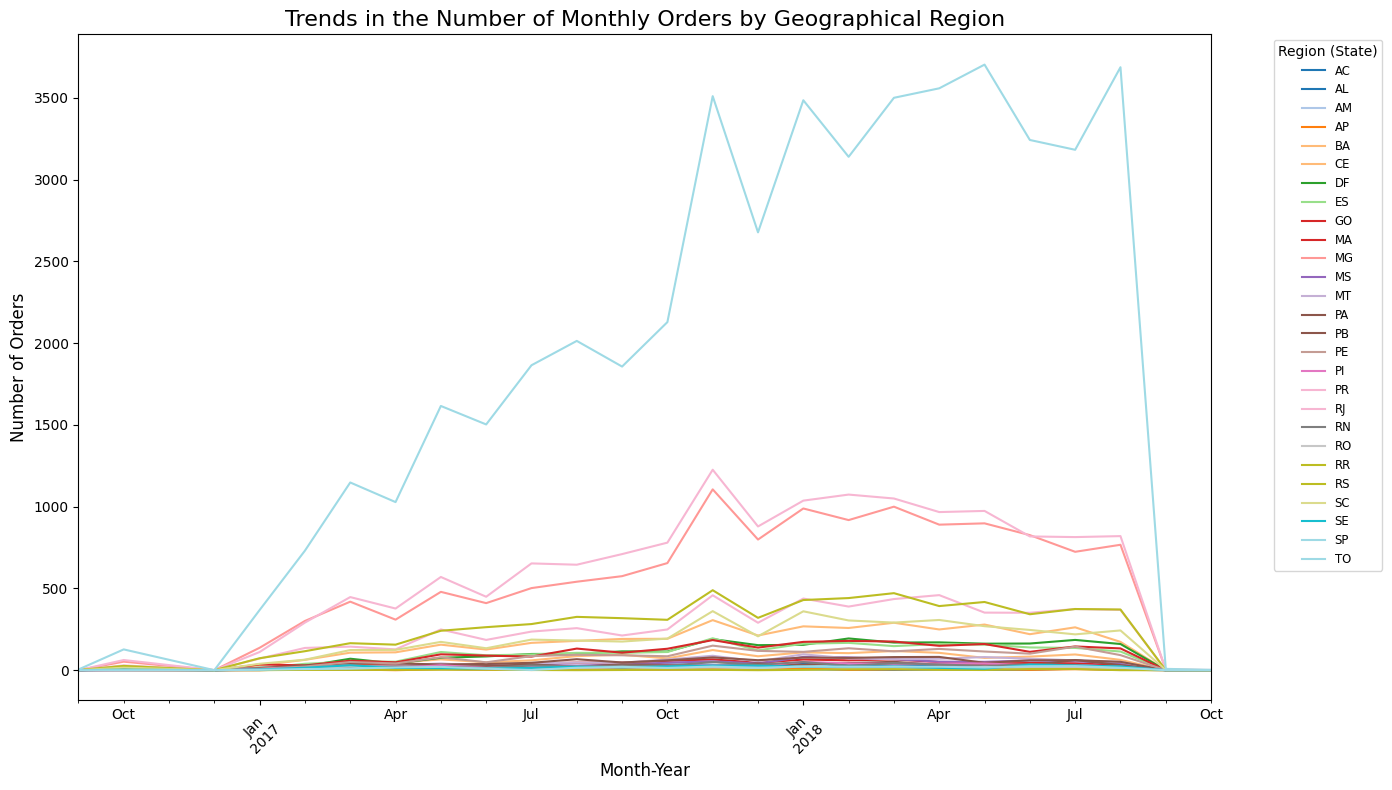

In [190]:
# Convert the 'order_purchase_timestamp_x' to datetime
all_data['order_purchase_timestamp_x'] = pd.to_datetime(all_data['order_purchase_timestamp_x'])

# Extract year and month for grouping
all_data['year_month'] = all_data['order_purchase_timestamp_x'].dt.to_period('M')

# Group by 'year_month' and 'customer_state' to count the number of orders
monthly_orders = all_data.groupby(['year_month', 'customer_state']).size().reset_index(name='order_count')

# Pivot the data to create a matrix of 'year_month' (rows) and 'customer_state' (columns) with 'order_count' as values
pivot_table = monthly_orders.pivot(index='year_month', columns='customer_state', values='order_count').fillna(0)

# Plotting the trends
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='line', ax=plt.gca(), cmap='tab20')

# Customize plot
plt.title('Trends in the Number of Monthly Orders by Geographical Region', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region (State)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()

# Show the plot
plt.show()


**Insight:**
- Seasonal Pattern: From the line plot, we can see that there are fluctuations in the number of orders in various regions throughout the year. In certain months, such as the end of the year (e.g. November or December), there is usually a significant increase in orders, which may be related to major shopping events such as Black Friday or end-of-year holidays.
- Geographic Region Performance: There are quite clear differences in the number of orders between the analyzed regions. For example, a region like SP (São Paulo) may have a much higher number of orders compared to other regions, indicating that this region is the largest market for e-commerce.
- Stock and Logistics Planning: Regions with a stable or increasing number of orders can become the company's main focus in terms of stock management and logistics distribution. Areas that show a downward trend can be analyzed further to find out the cause (for example, marketing problems or a decrease in purchasing power).

### Pertanyaan 2: How is the relationship between delivery time and customer satisfaction in order reviews?

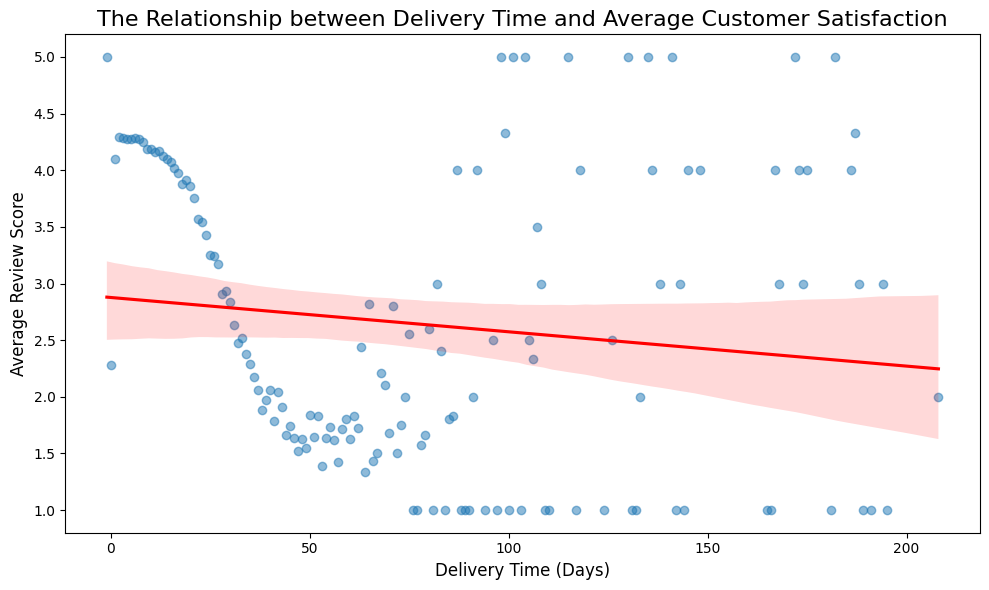

In [191]:
# Convert relevant columns to datetime for calculation
all_data['order_purchase_timestamp_x'] = pd.to_datetime(all_data['order_purchase_timestamp_x'])
all_data['order_delivered_customer_date_x'] = pd.to_datetime(all_data['order_delivered_customer_date_x'])

# Calculate delivery time in days
all_data['delivery_time_days'] = (all_data['order_delivered_customer_date_x'] - all_data['order_purchase_timestamp_x']).dt.days

# Filter the necessary columns for analysis and remove NaN values
delivery_review_data = all_data[['delivery_time_days', 'review_score']].dropna()

# Group by 'delivery_time_days' to calculate the average review score for each day
average_review_data = delivery_review_data.groupby('delivery_time_days').agg({'review_score': 'mean'}).reset_index()

# Create a regression plot to show the relationship between delivery time and average review score
plt.figure(figsize=(10, 6))
sns.regplot(x='delivery_time_days', y='review_score', data=average_review_data, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Add title and labels
plt.title('The Relationship between Delivery Time and Average Customer Satisfaction', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


**Insight:**
- Negative Correlation Between Delivery Time and Review Score: From the scatter plot, it can be seen that the longer the delivery time, the review score tends to decrease. This indicates that customers are less satisfied if their products are delivered more slowly.
- The Importance of Fast Delivery: From the trend line, we see a fairly significant relationship between delivery time and customer satisfaction. If shipping can be expedited, companies can improve their review scores, increasing overall customer satisfaction.
- Delivery Improvement Priorities: This insight can be used to improve delivery systems in areas or product categories that frequently experience delays. Fast delivery can be a competitive advantage, especially in e-commerce.

### Pertanyaan 3: Most Sales Product Categories in the Last 6 Months

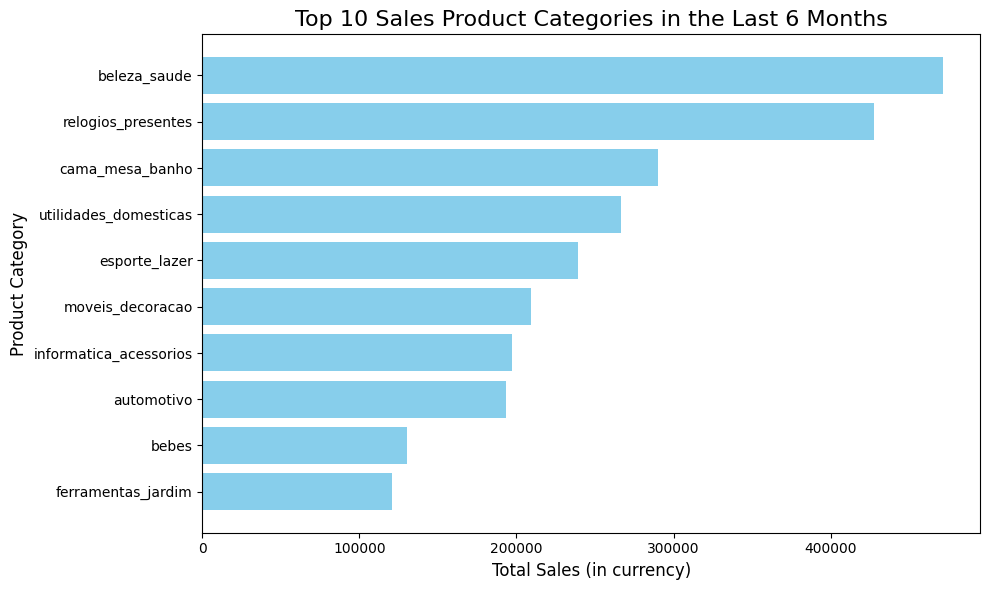

In [192]:
# Convert 'order_purchase_timestamp_x' to datetime for filtering
all_data['order_purchase_timestamp_x'] = pd.to_datetime(all_data['order_purchase_timestamp_x'])

# Filter data for the last 6 months
last_6_months = all_data[all_data['order_purchase_timestamp_x'] >= (all_data['order_purchase_timestamp_x'].max() - pd.DateOffset(months=6))]

# Group by 'product_category_name' and calculate the total sales (sum of price)
sales_by_category = last_6_months.groupby('product_category_name')['price'].sum().reset_index()

# Sort categories by total sales in descending order
top_sales_categories = sales_by_category.sort_values(by='price', ascending=False).head(10)  # Show top 10 categories

# Create a bar plot for the top-selling product categories
plt.figure(figsize=(10, 6))
plt.barh(top_sales_categories['product_category_name'], top_sales_categories['price'], color='skyblue')
plt.xlabel('Total Sales (in currency)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.title('Top 10 Sales Product Categories in the Last 6 Months', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value on top
plt.tight_layout()

# Show plot
plt.show()

**Insight:**
- The highest bars represent the top-selling product categories, meaning these categories have contributed the most to revenue over the last six months.
Identifying these categories can help you focus on what products are currently driving sales.
- The data can guide inventory and stock decisions. Categories with high sales might require more stock or better supply chain management to ensure availability.Low-performing categories (those not in the top 10) might need to be re-evaluated in terms of marketing efforts, pricing strategies, or even whether they should be retained.
If a category consistently performs well, it could indicate a strong customer preference for certain types of products. This insight can be used to tailor future product offerings or expand product lines within these categories.

### RFM Analysis

In [193]:
# Convert 'order_purchase_timestamp_x' to datetime
all_data['order_purchase_timestamp_x'] = pd.to_datetime(all_data['order_purchase_timestamp_x'])

# Define today's date as the latest date in the dataset for recency calculation
today_date = all_data['order_purchase_timestamp_x'].max() + pd.DateOffset(days=1)

# Calculate RFM metrics
rfm = all_data.groupby('customer_id_x').agg({
    'order_purchase_timestamp_x': lambda x: (today_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).rename(columns={
    'order_purchase_timestamp_x': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}).reset_index()

# Assign RFM scores
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=False) + 1  # Higher scores for lower recency
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

# Create a total score for segmentation
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Analyze RFM segments
rfm['Segment'] = 'Low Value'
rfm.loc[(rfm['R_score'] >= 4) & (rfm['F_score'] >= 4) & (rfm['M_score'] >= 4), 'Segment'] = 'High Value'
rfm.loc[(rfm['R_score'] <= 2) & (rfm['F_score'] <= 2) & (rfm['M_score'] <= 2), 'Segment'] = 'Churn'
rfm.loc[(rfm['R_score'] >= 3) & (rfm['F_score'] >= 3), 'Segment'] = 'Mid Value'

# Show the RFM table
print(rfm.head())

                      customer_id_x  Recency  Frequency  Monetary  R_score  \
0  00012a2ce6f8dcda20d059ce98491703      338          1     89.80        4   
1  000161a058600d5901f007fab4c27140      459          1     54.90        5   
2  0001fd6190edaaf884bcaf3d49edf079      597          1    179.99        5   
3  0002414f95344307404f0ace7a26f1d5      428          1    149.90        4   
4  000379cdec625522490c315e70c7a9fb      199          1     93.00        2   

   F_score  M_score RFM_Score    Segment  
0        1        3       413  Low Value  
1        1        2       512  Low Value  
2        1        5       515  Low Value  
3        1        4       414  Low Value  
4        1        3       213  Low Value  


<ipython-input-194-e2eb085bc4c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


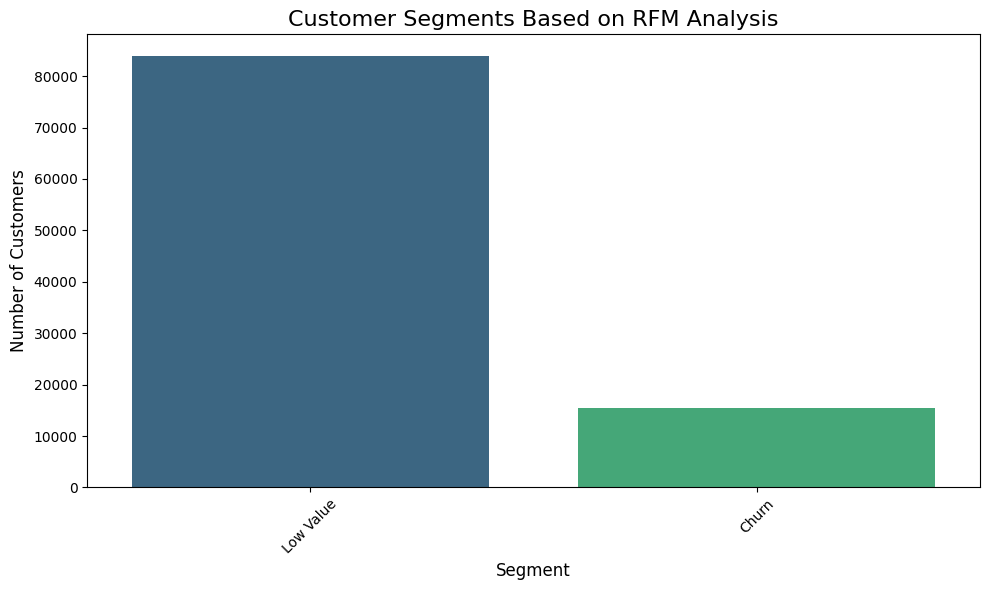

In [194]:
# Visualize the segments
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', palette='viridis')
plt.title('Customer Segments Based on RFM Analysis', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

**Insight:**
- High Value Customers: Customers with a high RFM score (R ≥ 4, F ≥ 4, M ≥ 4) are the most valuable segment. They make frequent purchases, have made purchases recently, and spend the most money. These are customers who need to be retained with special marketing strategies, such as loyalty programs or exclusive offers.
- Churn Customers: Customers who have a low RFM score (R ≤ 2, F ≤ 2, M ≤ 2) indicate a high risk of churn. They are prime targets for re-engagement campaigns or attractive offers to bring them back.

In [195]:
rfm.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.0,99441.000000
mean,290.900192,1.147334,137.286667,2.996822,1.0,2.999055
std,153.667316,0.552734,210.887422,1.412517,0.0,1.414519
min,1.000000,1.000000,0.000000,1.000000,1.0,1.000000
25%,167.000000,1.000000,45.000000,2.000000,1.0,2.000000
50%,272.000000,1.000000,85.900000,3.000000,1.0,3.000000
75%,401.000000,1.000000,149.900000,4.000000,1.0,4.000000
max,773.000000,22.000000,13440.000000,5.000000,1.0,5.000000


In [196]:
rfm.sort_values(by="Recency", ascending=True).head(5)

,customer_id_x,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
51713,856336203359aa6a61bf3826f7d84c49,1,1,0.0,1,1,1,111,Churn
63970,a4b417188addbc05b26b72d5e44837a1,1,1,0.0,1,1,1,111,Churn
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,14,1,0.0,1,1,1,111,Churn
74611,bf6181a85bbb4115736c0a8db1a53be3,17,1,0.0,1,1,1,111,Churn
15595,2823ffda607a2316375088e0d00005ec,19,1,0.0,1,1,1,111,Churn


In [197]:
rfm.sort_values(by="Frequency", ascending=False).head(5)

,customer_id_x,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
74119,be1c4e52bb71e0c54b11a26b8e8d59f2,366,22,1430.16,4,1,5,415,Low Value
97978,fc3d1daec319d62d49bfb5e1f83123e9,458,21,31.80,5,1,1,511,Low Value
73858,bd5d39761aa56689a265d95d8d32b8be,421,20,1974.00,4,1,5,415,Low Value
74118,be1b70680b9f9694d8c70f41fa3dc92b,238,20,2000.00,3,1,5,315,Low Value
6511,10de381f8a8d23fff822753305f71cae,328,15,982.35,4,1,5,415,Low Value


## Analisis Lanjutan (Opsional)

**Customer Review Sentiment Analysis**

Objective:

To understand customer review sentiment and identify patterns that influence positive and negative reviews. This can be done by using text mining for reviews left by customers.

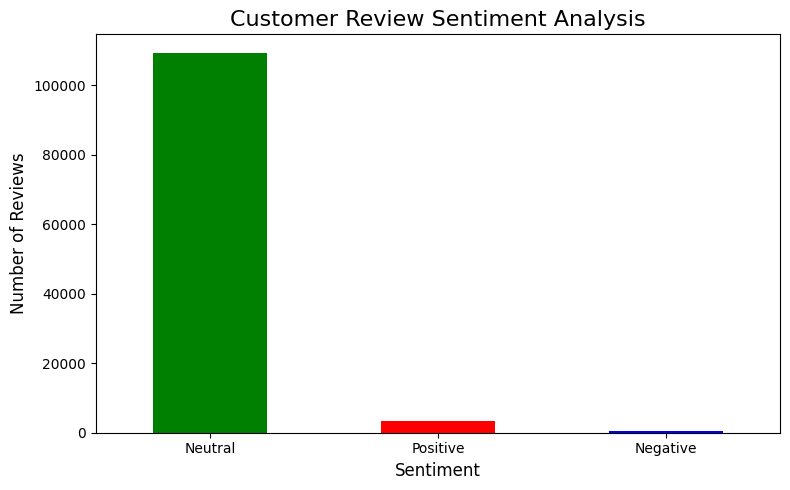

In [198]:
# Load the dataset (assuming it contains a column 'review_comment_message' for reviews)
# Adjust the file path as necessary
all_data = pd.read_csv('all_data.csv')

# Check the relevant columns and clean the data
reviews_data = all_data[['review_score', 'review_comment_message']].dropna()

# Function to get sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    # Classify as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
reviews_data['sentiment'] = reviews_data['review_comment_message'].apply(get_sentiment)

# Count sentiment categories
sentiment_counts = reviews_data['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Customer Review Sentiment Analysis', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

**Insight:**
- If the analysis results show a large proportion of reviews are positive, this indicates that the majority of customers are satisfied with the product or service provided. This can be an indication of the success of the product and marketing strategy.
On the other hand, if there is a high proportion of negative reviews, this indicates an issue that needs to be addressed. This could include product quality, customer service, or delivery experience.
- Sentiment analysis can provide an overview of overall customer satisfaction. Many positive reviews indicate loyalty and satisfaction, which can have a positive impact on sales and recommendations.

## Conclusion

**Conclution pertanyaan 1**

- Order trends show an increase in the number of orders during certain months, especially at the end of the year. This is most likely due to major shopping events such as Black Friday and end-of-year holidays.
- São Paulo (SP) is consistently the region with the highest number of orders, followed by other regions with much lower volumes. This area is very strategic for stock management and distribution because it has a large customer base.

**Conclution pertanyaan 2**
- There is a strong negative correlation between delivery time and customer review scores. The longer the delivery time, the lower the review score given by the customer, indicating dissatisfaction.

**Conclution pertanyaan 3**
- Certain product categories, such as electronics and household products, have dominated sales in the last 6 months. This shows the high level of consumer interest in these products.

**Conclution Analisis lanjutan**
- Overall, sentiment analysis provides valuable insight into how customers perceive the product or service being offered. By using these insights, businesses can make better and more strategic decisions in product development, marketing, and customer service.